# 다중클래스분류_callback활용_과적합방지_최고성능모델_저장

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [86]:
data = pd.read_csv('./data/winequality-white.csv', sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

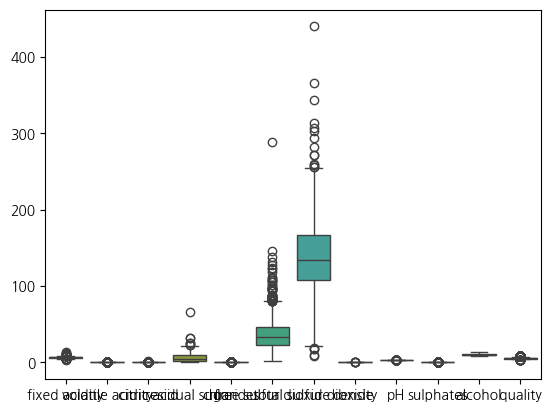

In [88]:
sns.boxplot(data)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [90]:
X = data.drop('quality', axis=1)
y = data['quality']

## 홀드아웃

In [91]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [92]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)

In [94]:
# 로버스트 스케일링 적용
rs = RobustScaler()
train_temp = rs.fit_transform(X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)

# 데이터프레임 형태로 전환(입력 데이터로 넣기 위함)
rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index=X_train.index)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index=X_test.index)


# 모델을 최소 성능에서 저장하고 중지하기

In [124]:
y_train.shape[1]

IndexError: tuple index out of range

In [96]:
rs_X_train.shape[1]

11

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [98]:
# 모델 적용
model = Sequential()
n_class = y_train.shape[1]

# 입력층
model.add(Input(shape=(rs_X_train.shape[1], )))

# 은닉층
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# 출력층
model.add(Dense(n_class, activation='softmax'))

# 모델 확인
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
import os

Epoch 1/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 372ms/step - accuracy: 0.2631 - loss: 1.8794 - val_accuracy: 0.4214 - val_loss: 1.6680
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4758 - loss: 1.5591 - val_accuracy: 0.4867 - val_loss: 1.3613
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.4724 - loss: 1.3251 - val_accuracy: 0.5010 - val_loss: 1.2556
Epoch 4/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5243 - loss: 1.1938 - val_accuracy: 0.5367 - val_loss: 1.1991
Epoch 5/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5516 - loss: 1.1698 - val_accuracy: 0.5490 - val_loss: 1.1716
Epoch 6/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5491 - loss: 1.1497 - val_accuracy: 0.5469 - val_loss: 1.1553
Epoch 7/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5812 - loss: 1.0858 - val_accuracy: 0.5612 - val_loss: 1.1391
Epoch 8/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5599 - loss: 1.0889 - val_ac

Epoch 51/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7176 - loss: 0.7066 - val_accuracy: 0.5490 - val_loss: 1.1484
Epoch 52/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7166 - loss: 0.7121 - val_accuracy: 0.5429 - val_loss: 1.1638
Epoch 53/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7264 - loss: 0.7090 - val_accuracy: 0.5531 - val_loss: 1.1508
Epoch 54/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7232 - loss: 0.7102 - val_accuracy: 0.5500 - val_loss: 1.1492
Epoch 55/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7273 - loss: 0.6981 - val_accuracy: 0.5480 - val_loss: 1.1766
Epoch 56/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7169 - loss: 0.6756 - val_accuracy: 0.5449 - val_loss: 1.1789
Epoch 57/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7181 - loss: 0.6980 - val_accuracy: 0.5439 - val_loss: 1.1685
Epoch 58/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7115 - loss: 0.6946 - 

Epoch 101/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8499 - loss: 0.4431 - val_accuracy: 0.5367 - val_loss: 1.4065
Epoch 102/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8435 - loss: 0.4445 - val_accuracy: 0.5276 - val_loss: 1.4233
Epoch 103/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8280 - loss: 0.4541 - val_accuracy: 0.5276 - val_loss: 1.4734
Epoch 104/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8354 - loss: 0.4743 - val_accuracy: 0.5378 - val_loss: 1.4603
Epoch 105/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8451 - loss: 0.4366 - val_accuracy: 0.5459 - val_loss: 1.4479
Epoch 106/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8642 - loss: 0.4033 - val_accuracy: 0.5378 - val_loss: 1.4430
Epoch 107/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8347 - loss: 0.4327 - val_accuracy: 0.5347 - val_loss: 1.4790
Epoch 108/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8530 - loss: 0

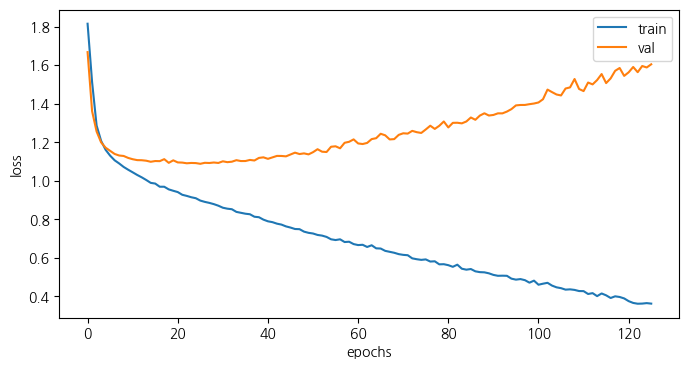

In [100]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# early_stop가 무엇인지 -> patience 등 무엇인지 알아보기
early_stop = EarlyStopping(patience=100)

# 딕렉토리를 최고 성능 모델이 생성된다면 자동 생성
os.makedirs('./model', exist_ok=True)
filepath = "./model/whitewine_loss_{val_loss:.4f}_epoch_{epoch:04d}.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)

# 모델 적용
history = model.fit(rs_X_test, y_test, epochs=1000, batch_size=32, validation_data=(rs_X_valid, y_valid), callbacks=[early_stop, model_save])

# 성능 그래프 확인
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


# 데이터 증폭 후 분석
- 데이터 증폭 + 스케일러 사용시
- 데이터 증폭 후 스케일러로 스케일링

In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [103]:
# 홀드아웃
X = data.drop('quality', axis=1)
y= data['quality']

In [104]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=42)

In [105]:
print(y_train.nunique())
print(y_valid.nunique())
print(y_test.nunique())

7
7
7


In [106]:
# 데이터 증폭 수행
smt = SMOTE(k_neighbors=2, random_state=42)
smt_X_train, smt_y_train = smt.fit_resample(X_train, y_train)

smt_X_train = pd.DataFrame(smt_X_train, columns=X_train.columns)
smt_y_train = pd.Series(smt_y_train)

/home/fintech/miniforge3/envs/fintech/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [107]:
# 로버스트 스케일링 적용
rs = RobustScaler()
train_temp = rs.fit_transform(smt_X_train)
valid_temp = rs.transform(X_valid)
test_temp = rs.transform(X_test)

# 데이터프레임 형태로 전환(입력 데이터로 넣기 위함)
rs_X_train = pd.DataFrame(train_temp, columns=X_train.columns)
rs_X_valid = pd.DataFrame(valid_temp, columns=X_valid.columns, index=X_valid.index)
rs_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index=X_test.index)

In [108]:
ot_smt_y_train = pd.get_dummies(smt_y_train)

In [109]:
ot_y_valid = pd.get_dummies(y_valid)

In [110]:
ot_y_test = pd.get_dummies(y_test)

In [111]:
# 모델 적용
model = Sequential()
n_class = ot_smt_y_train.shape[1]

# 입력층
model.add(Input(shape=(rs_X_train.shape[1], )))

# 은닉층
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# 출력층
model.add(Dense(n_class, activation='softmax'))

# 모델 확인
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 500ms/step - accuracy: 0.1530 - loss: 1.9680 - val_accuracy: 0.4500 - val_loss: 1.8251
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4575 - loss: 1.7610 - val_accuracy: 0.4490 - val_loss: 1.6140
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.4339 - loss: 1.5786 - val_accuracy: 0.4490 - val_loss: 1.4115
Epoch 4/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4510 - loss: 1.3808 - val_accuracy: 0.4816 - val_loss: 1.2537
Epoch 5/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4791 - loss: 1.2343 - val_accuracy: 0.5214 - val_loss: 1.2099
Epoch 6/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5590 - loss: 1.1545 - val_accuracy: 0.5306 - val_loss: 1.1935
Epoch 7/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5632 - loss: 1.1408 - val_accuracy: 0.5133 - val_loss: 1.1917
Epoch 8/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5473 - loss: 1.0986 - val_ac

Epoch 51/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7112 - loss: 0.7698 - val_accuracy: 0.5112 - val_loss: 1.2794
Epoch 52/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7090 - loss: 0.7253 - val_accuracy: 0.5082 - val_loss: 1.2854
Epoch 53/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6994 - loss: 0.7534 - val_accuracy: 0.5051 - val_loss: 1.2876
Epoch 54/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.7344 - loss: 0.7141 - val_accuracy: 0.5051 - val_loss: 1.2853
Epoch 55/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7358 - loss: 0.7119 - val_accuracy: 0.5020 - val_loss: 1.3057
Epoch 56/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7214 - loss: 0.7146 - val_accuracy: 0.5031 - val_loss: 1.3024
Epoch 57/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7324 - loss: 0.7018 - val_accuracy: 0.5031 - val_loss: 1.3122
Epoch 58/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7334 - loss: 0.6826 - 

Epoch 101/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8122 - loss: 0.5173 - val_accuracy: 0.5143 - val_loss: 1.6456
Epoch 102/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8291 - loss: 0.5006 - val_accuracy: 0.5031 - val_loss: 1.6590
Epoch 103/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8217 - loss: 0.4864 - val_accuracy: 0.5092 - val_loss: 1.6826
Epoch 104/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8379 - loss: 0.4752 - val_accuracy: 0.4980 - val_loss: 1.6691
Epoch 105/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8176 - loss: 0.5292 - val_accuracy: 0.5041 - val_loss: 1.7430
Epoch 106/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8297 - loss: 0.5068 - val_accuracy: 0.5112 - val_loss: 1.6867
Epoch 107/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8322 - loss: 0.4612 - val_accuracy: 0.5000 - val_loss: 1.7005
Epoch 108/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8307 - loss: 0

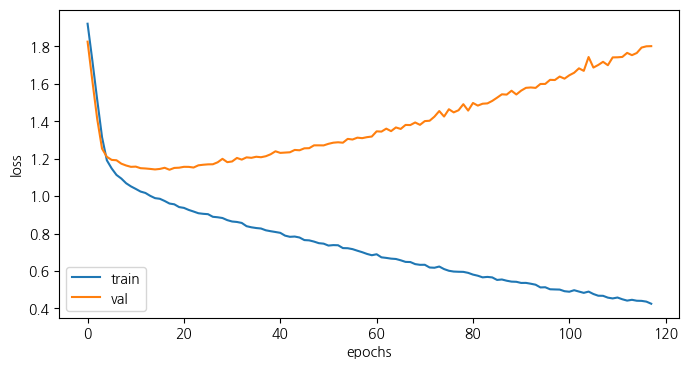

In [112]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# early_stop가 무엇인지 -> patience 등 무엇인지 알아보기
early_stop = EarlyStopping(patience=100)

# 딕렉토리를 최고 성능 모델이 생성된다면 자동 생성
os.makedirs('./model', exist_ok=True)
filepath = "./model/whitewine_loss_{val_loss:.4f}_epoch_{epoch:04d}.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)

# 모델 적용
history = model.fit(rs_X_test, ot_y_test, epochs=1000, batch_size=32, validation_data=(rs_X_valid, ot_y_valid), callbacks=[early_stop, model_save])

# 성능 그래프 확인
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


# 저장된 best 모델 불러와서 적용하기

In [113]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2613,6.6,0.36,0.52,10.10,0.050,29.0,140.0,0.99628,3.07,0.40,9.4
2361,8.2,0.25,0.46,3.75,0.050,14.0,102.0,0.99524,3.28,0.58,9.7
4245,7.6,0.35,0.47,13.30,0.037,42.0,116.0,0.99822,3.04,0.50,9.2
3947,6.1,0.30,0.32,2.20,0.042,41.0,142.0,0.98952,3.31,0.44,12.7
3799,7.0,0.30,0.28,2.20,0.042,21.0,177.0,0.99166,3.20,0.57,11.4
...,...,...,...,...,...,...,...,...,...,...,...
4502,7.1,0.25,0.31,2.30,0.050,32.0,156.0,0.99140,3.14,0.51,11.4
3148,6.2,0.23,0.36,17.20,0.039,37.0,130.0,0.99946,3.23,0.43,8.8
1562,7.1,0.34,0.49,1.50,0.027,26.0,126.0,0.99000,3.30,0.33,12.2
37,7.0,0.33,0.32,1.20,0.053,38.0,138.0,0.99060,3.13,0.28,11.2


In [114]:
y_test

2613    5
2361    5
4245    5
3947    7
3799    5
       ..
4502    6
3148    6
1562    7
37      6
668     6
Name: quality, Length: 980, dtype: int64

In [115]:
from keras.models import load_model

In [117]:
best_model = load_model('./model/whitewine_loss_1.0880_epoch_0026.keras')

wine_pred = best_model.predict(rs_X_test)
wine_pred = pd.DataFrame(wine_pred, index=X_test.index)
wine_pred


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


,0,1,2,3,4,5,6
2613,0.001941,0.012130,0.796466,0.183665,0.004208,0.000819,0.000772
2361,0.010720,0.077796,0.545171,0.327579,0.027855,0.007612,0.003267
4245,0.004031,0.022415,0.546737,0.404205,0.017340,0.003673,0.001599
3947,0.002879,0.007794,0.062195,0.501913,0.370128,0.054404,0.000687
3799,0.001348,0.024498,0.611934,0.338579,0.019342,0.003976,0.000323
...,...,...,...,...,...,...,...
4502,0.004837,0.022935,0.253819,0.612292,0.090573,0.014466,0.001077
3148,0.000549,0.003124,0.165834,0.810582,0.018804,0.001058,0.000048
1562,0.012435,0.083220,0.226730,0.502295,0.108004,0.060920,0.006396
37,0.010047,0.032511,0.417301,0.472462,0.052294,0.011752,0.003634


In [122]:
best_model.evaluate(rs_X_test, y_test)

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 7)